# 0.2 Data Wranling

- Consiste en la manipulación,limpiezay unificación de conjuntos de datos complejos y desordenados para facilitar su acceso,análisis y modelado.El
proceso incluye convertir y mapear los datos crudos,y dejarlos en un formato más adecuado para su uso.
- Tenemos consideración especial es este apartado ya que entendemos que aproximadamente el 60% del esfuerzo de un trabajo de Data Science
consiste en Data Wrangling.
- Las etapas se componen en descubrimiento, estructuración, limpieza,enriquecimiento, validación, pubicación.

## Import libraries

In [12]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Modulo para trabajar con los directorios del proyecto
from src.utils.paths import data_dir

## Set up

In [14]:
# Configuracion de opciones
# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None
# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

## Read Data

In [15]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINE_RAW_CSV_PATH = data_dir("raw", "wine_dataset.csv")
WINES_SPA_RAW_CSV_PATH = data_dir("raw", "wines_SPA.csv")

WINE_RAW_CSV_PATH , WINES_SPA_RAW_CSV_PATH

(WindowsPath('c:/Users/cvigo/data-projects/vinos_coderhouse/data/raw/wine_dataset.csv'),
 WindowsPath('c:/Users/cvigo/data-projects/vinos_coderhouse/data/raw/wines_SPA.csv'))

In [16]:
# Leemos los csv's y los guardamos en un dataframe
df_wine = pd.read_csv(WINE_RAW_CSV_PATH)
df_wine_spa = pd.read_csv(WINES_SPA_RAW_CSV_PATH)

### SETUP

In [31]:
COLOR = "#7C3030"

Como tenemos dos datasets vamos a trabajarlos por separado en primera instancia para ver como los podemos unificar luego y hacer un analisis integrado

## Wine Dataset

In [18]:
# Vista previa de 10 datos aleatorios
df_wine.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
4564,5.5,0.340,0.26,2.2,0.021,31.0,119.0,0.98919,3.55,0.49,13.0,8,white
4968,7.0,0.220,0.28,10.6,0.039,32.0,117.0,0.99355,3.05,0.55,11.5,7,white
4087,7.9,0.270,0.27,1.7,0.034,25.0,122.0,0.99088,2.97,0.51,11.9,6,white
3060,6.4,0.145,0.49,5.4,0.048,54.0,164.0,0.99460,3.56,0.44,10.8,6,white
1442,6.9,0.630,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5,red
5322,5.7,0.265,0.28,6.9,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,white
1771,7.6,0.480,0.37,0.8,0.037,4.0,100.0,0.99020,3.03,0.39,11.4,4,white
5091,6.0,0.280,0.27,15.5,0.036,31.0,134.0,0.99408,3.19,0.44,13.0,7,white
2355,5.8,0.250,0.28,11.1,0.056,45.0,175.0,0.99755,3.42,0.43,9.5,5,white
4023,6.2,0.440,0.18,7.7,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5,white


### Descubrimiento y estructuración
- Comprender los datos la estructura, tipos y calidad

In [19]:
# Shape de los datos
print(f"{df_wine.shape =}")

df_wine.shape =(6497, 13)


In [21]:
# Obtenemos información de las columnas de los datos
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<AxesSubplot:>

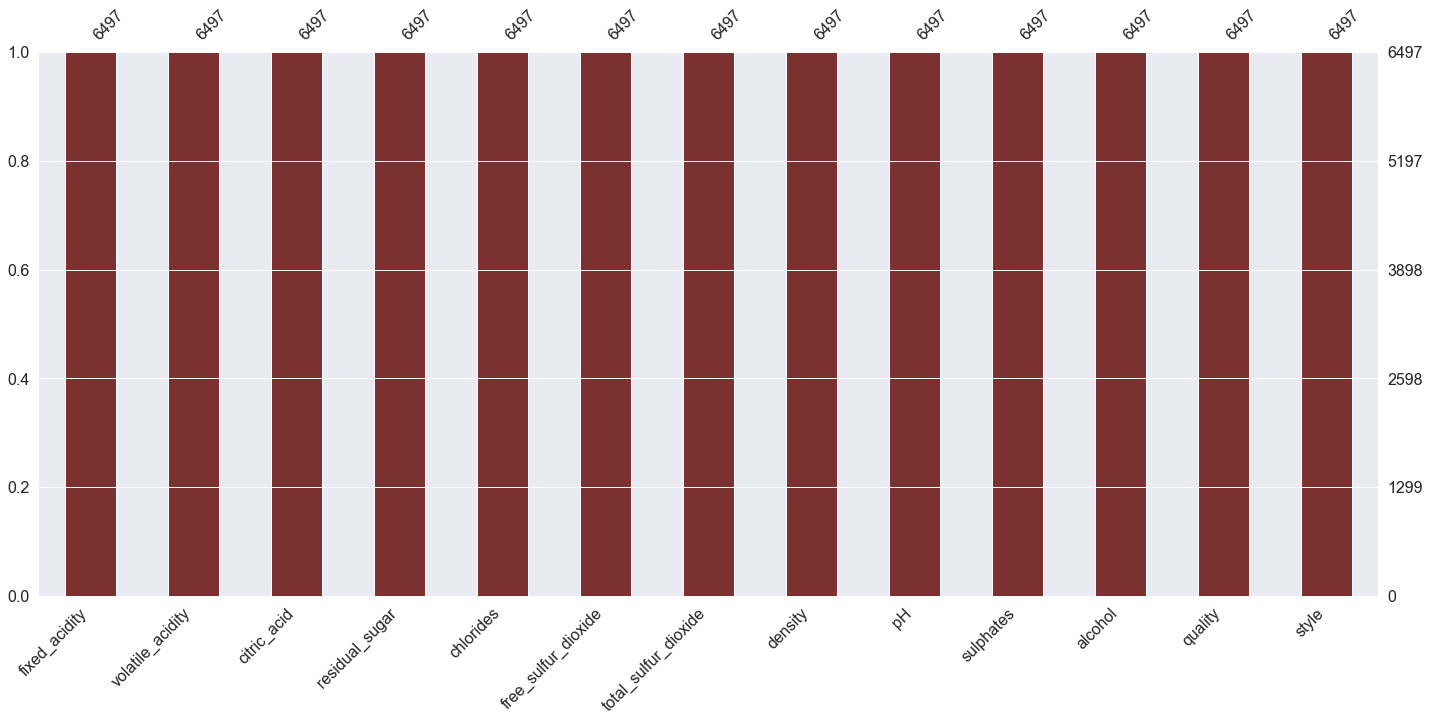

In [32]:
# Visualizamos los missings utilizando la libreria missingno
import missingno as msno
msno.bar(df_wine, color= COLOR)


### Limpieza de datos
- Outliers
- Missing values

### Outliers Data
- Para detectar outliers podemos utilizar gráficos del tipo BoxPloty scatterplot.
- Lo primero que hacemos es detectar las correlaciones más fuertes con el output SalePrice.
- Centraremos nuestros esfuerzos en quitar los outliers de las 3 correlaciones mas fuertes con SalePrice(Overall Qual,Gr Liv AreayGarage Cars).

In [37]:
df_wine.corr()["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

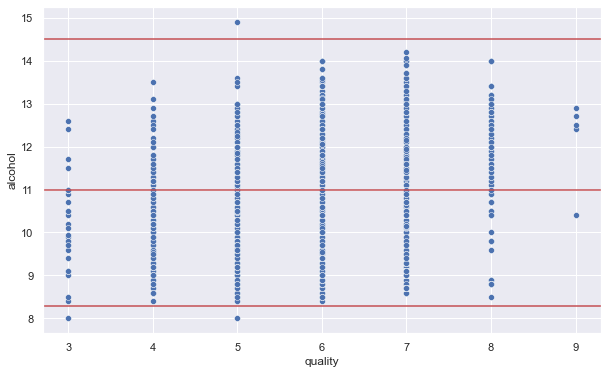

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_wine, x='quality', y='alcohol')
plt.axhline(y=14.5,color='r')
plt.axhline(y=11,color='r')
plt.axhline(y=8.3,color='r')
plt.show()

## Wine SPA Dataset

In [20]:
# Vista previa de 10 datos aleatorios
df_wine_spa.sample(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
5485,Campillo,Gran Reserva Rioja,2012,4.2,410,Espana,Rioja,22.99,Rioja Red,4.0,3.0
3348,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,NaN,NaN
5437,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
6592,Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,5.0,3.0
1760,Valdecuevas,Cuvee Verdejo,2018,4.3,31,Espana,Rueda,12.00,Verdejo,3.0,3.0
181,Pago de Carraovejas,Cuesta de Las Liebres,2010,4.6,405,Espana,Ribera del Duero,81.50,Ribera Del Duero Red,5.0,3.0
2433,Bodegas La Horra,Corimbo I,2015,4.2,412,Espana,Ribera del Duero,37.90,Ribera Del Duero Red,5.0,3.0
4732,La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Espana,Rioja,13.58,Rioja Red,4.0,3.0
2758,Bodegas La Horra,Corimbo I,2015,4.2,412,Espana,Ribera del Duero,37.90,Ribera Del Duero Red,5.0,3.0
4809,Vina Pedrosa,Gran Reserva,2011,4.2,410,Espana,Ribera del Duero,51.35,Ribera Del Duero Red,5.0,3.0
